### Pandas Advance

In [164]:
import pandas as pd
import numpy as np
import os

In [165]:
Practise_Data='C:\\Users\\mdmes\\OneDrive\\Desktop\\Pandas Data'
dataset_path=os.path.join(Practise_Data,'health_monitor_data.csv')

dataset_path

'C:\\Users\\mdmes\\OneDrive\\Desktop\\Pandas Data\\health_monitor_data.csv'

### Load Data

In [166]:
health_data=pd.read_csv(
    dataset_path
)
health_data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,'2020/12/01',110,130,409.1,Easy
1,60,'2020/12/02',117,145,479.0,Moderate
2,60,'2020/12/03',103,135,340.0,Moderate
3,45,'2020/12/04',109,175,282.4,Moderate
4,45,'2020/12/05',117,148,406.0,Heavy


### Data cleaning

In [167]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  33 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     33 non-null     int64  
 3   Maxpulse  33 non-null     int64  
 4   Calories  31 non-null     float64
 5   Type      33 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


In [168]:
''' 
missing value handaling
1. remove data row (when data set is large)
2. input number in missing value (when data set is small)
'''

' \nmissing value handaling\n1. remove data row (when data set is large)\n2. input number in missing value (when data set is small)\n'

In [169]:
''' 
Create a mask for find null value in dataset
'''
mask = health_data.isnull().any(axis=1)
mask

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18     True
19    False
20    False
21    False
22     True
23    False
24    False
25    False
26    False
27    False
28     True
29    False
30    False
31    False
32    False
dtype: bool

In [170]:
health_data[mask]

,Duration,Date,Pulse,Maxpulse,Calories,Type
18,45,'2020/12/18',90,112,NaN,Moderate
22,45,NaN,100,119,282.0,Moderate
28,60,'2020/12/28',103,132,NaN,Heavy


In [171]:
average_calories = health_data['Calories'].mean()
print(average_calories)

302.93870967741935


In [172]:
health_data['Calories']=health_data['Calories'].fillna(
    value=average_calories,
)

health_data.head(20)

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,'2020/12/01',110,130,409.10000,Easy
1,60,'2020/12/02',117,145,479.00000,Moderate
2,60,'2020/12/03',103,135,340.00000,Moderate
3,45,'2020/12/04',109,175,282.40000,Moderate
4,45,'2020/12/05',117,148,406.00000,Heavy
5,60,'2020/12/06',102,127,300.00000,Easy
6,60,'2020/12/07',110,136,374.00000,Moderate
7,450,'2020/12/08',104,134,253.30000,Moderate
8,30,'2020/12/09',109,133,195.10000,Heavy
9,60,'2020/12/10',98,124,269.00000,Moderate


In [173]:
mask = health_data.isnull().any(axis=1)
health_data[mask]

,Duration,Date,Pulse,Maxpulse,Calories,Type
22,45,NaN,100,119,282.0,Moderate


In [174]:
health_data = health_data.dropna()
health_data.isnull().sum()

Duration    0
Date        0
Pulse       0
Maxpulse    0
Calories    0
Type        0
dtype: int64

In [175]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 0 to 32
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  32 non-null     int64  
 1   Date      32 non-null     object 
 2   Pulse     32 non-null     int64  
 3   Maxpulse  32 non-null     int64  
 4   Calories  32 non-null     float64
 5   Type      32 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.8+ KB


### Remove Duplicate

In [176]:
mask = health_data.duplicated()
print(mask)

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32     True
dtype: bool


In [177]:
health_data[mask]

,Duration,Date,Pulse,Maxpulse,Calories,Type
32,60,'2020/12/12',100,120,250.7,Heavy


In [178]:
health_data = health_data.drop_duplicates()

In [179]:
health_data.duplicated().sum()

np.int64(0)

In [180]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  31 non-null     int64  
 1   Date      31 non-null     object 
 2   Pulse     31 non-null     int64  
 3   Maxpulse  31 non-null     int64  
 4   Calories  31 non-null     float64
 5   Type      31 non-null     object 
dtypes: float64(1), int64(3), object(2)
memory usage: 1.7+ KB


### Convert Data types

In [181]:
health_data ['Date'] = health_data['Date'].astype('datetime64[ns]')
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 0 to 31
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Duration  31 non-null     int64         
 1   Date      31 non-null     datetime64[ns]
 2   Pulse     31 non-null     int64         
 3   Maxpulse  31 non-null     int64         
 4   Calories  31 non-null     float64       
 5   Type      31 non-null     object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.7+ KB


### Clear Out layer of Dataset

In [182]:
''' 
InterQuartile Range(IQR)
IQR = Q3 - Q1 
L (lower bound) = (Q1 - 1.5 ) * IQR
U (upper bound) = (Q3 + 1.5 ) * IQR
'''

Q1 = health_data['Pulse'].quantile(0.25)
Q3 = health_data['Pulse'].quantile(0.75)

IQR = Q3 - Q1

L = Q1 - 1.5 * IQR
U = Q3 + 1.5 * IQR

print(Q1,Q3)
print(L, U)


100.0 107.0
89.5 117.5


In [183]:
non_Outlier_mask = health_data['Pulse'].between(L,U)
Outlier_mask = ~non_Outlier_mask

health_data[Outlier_mask]

,Duration,Date,Pulse,Maxpulse,Calories,Type
23,60,2020-12-23,130,101,300.0,Heavy


In [184]:
health_data = health_data[non_Outlier_mask]
health_data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,60,2020-12-01,110,130,409.1,Easy
1,60,2020-12-02,117,145,479.0,Moderate
2,60,2020-12-03,103,135,340.0,Moderate
3,45,2020-12-04,109,175,282.4,Moderate
4,45,2020-12-05,117,148,406.0,Heavy


### Exploratory Data Analysis

In [189]:
health_data.describe()

,Duration,Date,Pulse,Maxpulse,Calories
count,30.000000,30,30.000000,30.000000,30.000000
mean,69.500000,2020-12-15 10:24:00,102.733333,129.733333,305.475914
min,30.000000,2020-12-01 00:00:00,90.000000,112.000000,195.100000
25%,60.000000,2020-12-08 06:00:00,100.000000,120.750000,250.700000
50%,60.000000,2020-12-14 12:00:00,102.500000,128.500000,300.000000
75%,60.000000,2020-12-23 06:00:00,105.750000,132.750000,343.975000
max,450.000000,2020-12-31 00:00:00,117.000000,175.000000,479.000000
std,72.258516,NaN,6.351396,12.241629,65.860156


<Axes: xlabel='Pulse'>

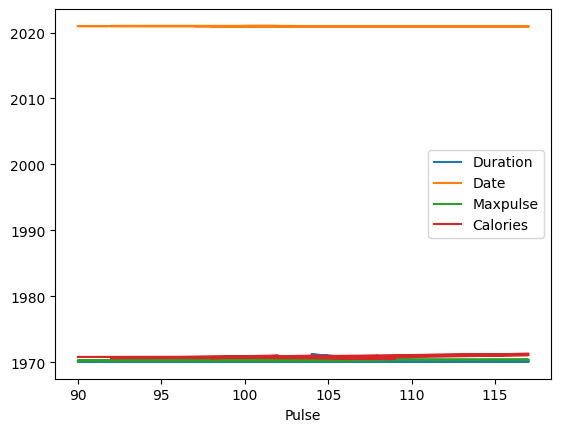

In [191]:
''' plot '''
health_data.plot(
    kind='line',
    x='Pulse'
)



### Data Transformation

In [197]:
'''
Data can Numeric or categorical

Numeric : We need to normalize out data
Categorical : we need to encode categorical data
'''
def normalize(colum):
    mean = colum.mean()
    std = colum.std()
    return (colum - mean )/ std


health_data['Calories'] = health_data['Calories'].agg(normalize)
health_data['Duration'] = health_data['Duration'].agg(normalize)
health_data['Pulse'] = health_data['Pulse'].agg(normalize)
health_data['Maxpulse'] = health_data['Maxpulse'].agg(normalize)

health_data.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type
0,-0.131472,2020-12-01,1.144105,0.021784,1.573396,Easy
1,-0.131472,2020-12-02,2.246225,1.247111,2.634735,Moderate
2,-0.131472,2020-12-03,0.041986,0.430226,0.524203,Moderate
3,-0.339060,2020-12-04,0.986660,3.697765,-0.350377,Moderate
4,-0.339060,2020-12-05,2.246225,1.492176,1.526326,Heavy


In [199]:
'''  
Encoding categorical data
- One hot encoding (useing pandas & sklearn)
- label encoding
'''
health_data['Type'].value_counts()

Type
Moderate    14
Heavy       12
Easy         4
Name: count, dtype: int64

In [201]:
'''
One hot encoding
category = type
value = Moderate , Heavy, Easy

Moderate = [1, 0, 0]
Heavy    = [0, 1, 0]
Easy     = [0, 0, 1]
'''

health_data_One_hot_encoding = pd.get_dummies(
    health_data, 
    columns=['Type'],
    sparse=True
)

health_data_One_hot_encoding.head()

,Duration,Date,Pulse,Maxpulse,Calories,Type_Easy,Type_Heavy,Type_Moderate
0,-0.131472,2020-12-01,1.144105,0.021784,1.573396,True,False,False
1,-0.131472,2020-12-02,2.246225,1.247111,2.634735,False,False,True
2,-0.131472,2020-12-03,0.041986,0.430226,0.524203,False,False,True
3,-0.339060,2020-12-04,0.986660,3.697765,-0.350377,False,False,True
4,-0.339060,2020-12-05,2.246225,1.492176,1.526326,False,True,False


In [204]:

'''
Label encoding

category - type
value - moderate, Heavy, Easy

Easy = 0
moderate = 1
Heavy = 2
'''

health_data['label_encoded_type'] = pd.Categorical(
    health_data['Type'],
    categories=['Easy', 'Moderate', 'Heavy'],
    ordered= True
).codes

health_data.head()


,Duration,Date,Pulse,Maxpulse,Calories,Type,label_encoded_type
0,-0.131472,2020-12-01,1.144105,0.021784,1.573396,Easy,0
1,-0.131472,2020-12-02,2.246225,1.247111,2.634735,Moderate,1
2,-0.131472,2020-12-03,0.041986,0.430226,0.524203,Moderate,1
3,-0.339060,2020-12-04,0.986660,3.697765,-0.350377,Moderate,1
4,-0.339060,2020-12-05,2.246225,1.492176,1.526326,Heavy,2


### Data Spliting

In [206]:
''' 
Split data into train test validation set
'''

' \nSplit data into train test validation set\n'

### Thank You 